<img src="images/iebs-logo.jpg" alt="Logo IEBS" align="center">
<br><br>
<h1><font color="#113D68" size=5>Análisis predictivo con Deep Learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: Análisis problema de clasificación con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 4: Caso práctico</font><br>
<font size=3>IEBS</font>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [CIFAR10 Dataset](#section2)
* [Experimentos con redes neuronales densas](#section3)
    - [Experimento 1](section3.1)
    - [Experimento 2](section3.2)
* [Experimentos con CNNs](#section4)
    - [Experimento 3](section4.1)
    - [Experimento 4](section4.2)
* [Experimento Opcional](#section5)
* [Conclusión](#section6)

In [29]:
import tensorflow as tf
import numpy as np

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

<a id="section1"></a>
# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset de imágenes (CIFAR10) y realizar varios experimentos con distintas redes para descubrir cual funciona mejor y cual elegimos para pasar a producción. Por lo que además de tener que entrerar distintas redes y entender qué ha pasado en cada entrenamiento explicando el resultado, al final deberemos justificar cual de todos los modelos entrenados es el más óptimo para pasar a producción.

Cada experimento que tendremos que realizar estará bien definido, la rede que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma. Por cada experimento deberéis de sacar conclusiones de cómo de bueno o malo ha sido ese entrenamiento. Al final de todos los experimentos, deberemos de generar una pequeña documentación donde justificamos cual de los modelos entrenados es el más óptimo para pasar a producción.

<a id="section1.1"></a>
# <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los experimentos que están definidos. En cada experimento está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow. Al finalizar cada experimento se deberá genera una pequeña documentación explicando cómo ha sido el entrenamiento y sacando conclusiones de los resultados.

Al final, después de realizar cada uno de los experimentos, se deberá de generar una pequeña documentación justificando cual de los modelos entreados es el óptimo para ser desplegado en producción.

Es muy importante destacar que el objetivo de este caso práctico no es que obtengáis unos resultados muy buenos, de echo los resultados que obtendréis son los pre-definidos por las redes que tenéis que hacer. El objetivo principal es que veáis como se aborda un problema para ser resuelto con Deep Learning, donde partimos de un dataset y un objetivo, y vamos realizando diferentes experimentos hasta encontrar la solución más óptima que podemos llegar a desplegar en producción. Además, otro objetivo es que entendáis que estáis haciendo y los resultados que obtenéis con cada experimento: sin son buenos o malos, si hay sobreajuste en los datos de entrenamiento, si nuestra red no termina por aprender, si nuestra red se estanca en algún punto y ya no aprende más, etc.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.


<a id="section1.2"></a>
# <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional se trata de que vosotros creéis vuestra propia red neuronal para obtener mejores resultados que los de la parte obligatoria. Obviamente no es obligatorio conseguir mejores resultados. Se os indicarán algunan pautas adicionales para poder crear vuestra propia red de la nada. ¡Esta parte podéis verla como un reto!

<a id="section1.3"></a>
# <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset CIFAR10 con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Escribir un pequeño texto explicando el resultado de cada entrenamiento.
* Escribir un pequeño texto de conclusión al final del cuaderno justificando el modelo elegido para desplegar.

<a id="section1.4"></a>
# <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter en formato html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección. 

<a id="section1.5"></a>
# <font color="#004D7F" size=4>Temporalización</font>
* Fase 1: Instala y familiarizate con todo el entorno de trabajo.
* Fase 2: Cargar los datos y familizarizarse con ellos.
* Fase 3: Realizar cada uno de los experimentos indicados.
* Fase 4: Escribir un texto de conclusión al final.

<a id="section2"></a>
# <font color="#004D7F" size=5>CIFAR10 dataset</font>

Este dataset es el que hemos visto en la clase anterior y con el que trabajaremos en el caso práctico. Para refresarlo, es un dataset que contiene imágenes en color de objetos que tenemos que clasificar.

El dataset de de imágenes CIFAR10 tiene las siguintes características:
- Imágenes de 10 tipos de objetos: aviones, automóbiles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de tamaño 32x32x3, 32x32 píxeles y 3 valores por pixel.
- 50.000 imágenes para el entrenamiento y 10.000 imágenes para el test.

<br><br>
<img src="images/rgb-image.png" align="center" width="400">

Para empezar debemos descargar los datos de las bases de datos de Tensorflow.

### Preparar datos de entrenamiento

In [30]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Normalizamos los valores entre 0 y 1.

In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
#COMPLETAR: escribe aquí tu código

print("Num training images: ", x_train.shape[0])
print("Num test images: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[1])
print("Label: ", labels[y_train[1][0]])
img = x_train[0]
print("Valores de una imágen:")
print(img)

Num training images:  50000
Num test images:  10000
Dimension input:  (50000, 32, 32, 3)
Dimension output:  (50000, 1)
Output example:  [9]
Label:  truck
Valores de una imágen:
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745

<a id="section3"></a>
# <font color="#004D7F" size=5>Experimentos con redes neuronales densas</font>
A continuación, realizar 2 experimentos usando redes neuronales densas con las redes que se te indican en cada sección.

<a id="section3.1"></a>
# <font color="#004D7F" size=4>Experimento 1</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`
- Capa densa `Dense` con 10 neuronas y función de activación _ReLU_
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.01
- Función de error: `sparce_categorical_crossentropy`
- Métricas: `accuracy`
- Número de *epochs*: 20

#### Crear y entrenar la red neuronal 

In [33]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compilamos el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Visualizamos modelo
model.summary()

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3400 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3038 - accuracy: 0.1018 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3041 - accuracy: 0.0973 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3042 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3041 - accuracy: 0.0976 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3042 - val_accuracy:

### Evaluar modelo

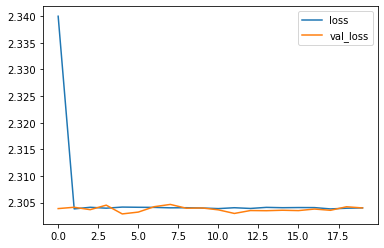

In [34]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

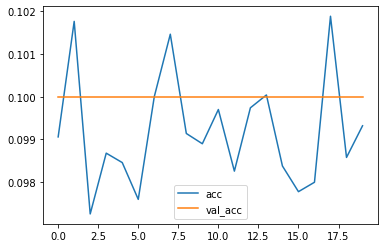

In [35]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

El modelo consta de 30.840 parametros para entrenar y 3 capas:

La primera capa es una Flatten y nos ha permitido aplanar 3072 parametros. Tanto la segunda como la tercera capa son de tipo Dense con 10 neuronas de activación respectivamente. La primera de tipo Relu y la segunda Softmax.

Los resultados no son muy esperanzadores con solo un 10% y en el conjunto de test o validación también un 10%

<a id="section3.2"></a>
# <font color="#004D7F" size=4>Experimento 2</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 128 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 40

#### Crear y entrenar la red neuronal 

In [36]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40)

# Visualizamos modelo
model.summary()


Epoch 1/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8882 - accuracy: 0.3059 - val_loss: 1.8100 - val_accuracy: 0.3376
Epoch 2/40
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7610 - accuracy: 0.3586 - val_loss: 1.7188 - val_accuracy: 0.3745
Epoch 3/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7096 - accuracy: 0.3799 - val_loss: 1.7907 - val_accuracy: 0.3694
Epoch 4/40
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6783 - accuracy: 0.3902 - val_loss: 1.6522 - val_accuracy: 0.3956
Epoch 5/40
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6505 - accuracy: 0.4025 - val_loss: 1.6639 - val_accuracy: 0.3956
Epoch 6/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6346 - accuracy: 0.4125 - val_loss: 1.6463 - val_accuracy: 0.4083
Epoch 7/40
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6194 - accuracy: 0.4165 - val_loss: 1.6387 - val_accuracy:

### Evaluar modelo

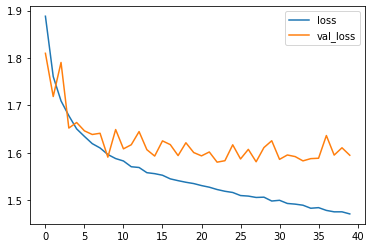

In [37]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

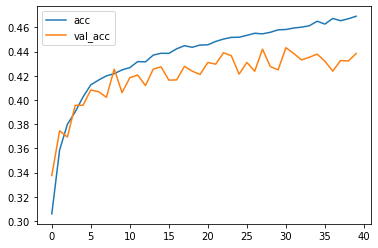

In [38]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

El modelo consta de 110.058 parametros para entrenar y 5 capas:

La primera capa es una Flatten y nosha permitido aplanar 1024 parametros. Tanto la segunda, la tercera, la cuarta y la quinta capa son de tipo Dense con 32, 64, 128 y 10 neuronas de activación respectivamente. Las 3 primeras de tipo Relu y la ultima Softmax.

Los resultados no son muy esperanzadores con solo un 47% y en el conjunto de test o validación son de un 44%

<a id="section4"></a>
# <font color="#004D7F" size=5>Experimentos con CNNs</font>
A continuación, realizar 2 experimentos usando redes convolucionales con las redes que se te indican en cada sección.

<a id="section4.1"></a>
# <font color="#004D7F" size=4>Experimento 3</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.0001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10

#### Crear y entrenar la red neuronal 

In [39]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilamos el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Visualizamos modelo
model.summary()

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8652 - accuracy: 0.3411 - val_loss: 1.6440 - val_accuracy: 0.4208
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5696 - accuracy: 0.4436 - val_loss: 1.5299 - val_accuracy: 0.4571
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4414 - accuracy: 0.4878 - val_loss: 1.3910 - val_accuracy: 0.5097
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.3612 - accuracy: 0.5176 - val_loss: 1.3304 - val_accuracy: 0.5302
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.3037 - accuracy: 0.5411 - val_loss: 1.2975 - val_accuracy: 0.5389
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2634 - accuracy: 0.5538 - val_loss: 1.2646 - val_accuracy: 0.5565
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2263 - accuracy: 0.5706 - val_loss: 1.2300 -

### Evaluar modelo

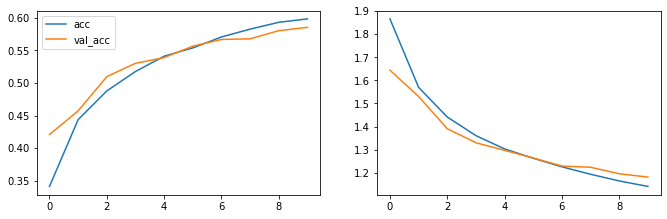

In [40]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

El modelo consta de 265.834 parametros para entrenar y de 6 capas: 

La primera capa es una convolucional con un valor o tamaño de salida de 32x32x16. Los parametros que va a tener que aprender en esta capa son de 1216 y los 16 son los kernels a aplicar por cada capa.
La segunda capa es de pooling, exactamente max pooling. Al tener tanto un pool size y un stride de 2x2, reduciremos a la mitad el tamaño de nuestra imagen.
La tercera capa nos ha permitido aplanar 4096 parametros (= 16x16x16).
La cuarta, quinta y sexta capa es de tipo densa de activación con 64, 32 y 10 neuronas respectivamente.

Los resultados no son muy esperanzadores con solo un 60% y en el conjunto de test o validación son de un 59%

<a id="section4.2"></a>
# <font color="#004D7F" size=4>Experimento 4</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 32 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 20


#### Crear y entrenar la red neuronal 

In [41]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Visualizamos modelo
model.summary()



Epoch 1/20
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4860 - accuracy: 0.4600 - val_loss: 1.1988 - val_accuracy: 0.5725
Epoch 2/20
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0842 - accuracy: 0.6166 - val_loss: 1.0587 - val_accuracy: 0.6223
Epoch 3/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.9054 - accuracy: 0.6816 - val_loss: 0.9180 - val_accuracy: 0.6826
Epoch 4/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.7862 - accuracy: 0.7245 - val_loss: 0.9359 - val_accuracy: 0.6871
Epoch 5/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.6942 - accuracy: 0.7564 - val_loss: 0.9531 - val_accuracy: 0.6784
Epoch 6/20
1563/1563 [==============================] - 136s 87ms/step - loss: 0.6151 - accuracy: 0.7852 - val_loss: 0.9450 - val_accuracy: 0.6978
Epoch 7/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5499 - accuracy: 0.8062 - val_loss: 0

### Evaluar modelo

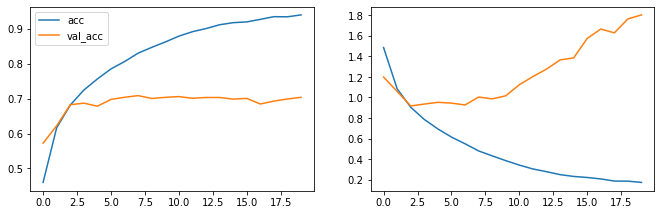

In [42]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

El modelo consta de 222.410 parametros para entrenar y 9 capas: 

La primera capa es una convolucional con un valor o tamaño de salida de 32x32x32. Los parametros que va a tener que aprender en esta capa son de 2432 y con 32 kernels a aplicar por cada capa.
La segunda capa es de pooling, exactamente max pooling. Al tener tanto un pool size y un stride de 2x2, reduciremos a la mitad el tamaño de nuestra imagen.
La tercera capa es una convolucional con un valor de salida de 16x16x32. Los parametros son de 51264 y con 64 kernels.
La cuarta capa es de max pooling con un size y stride de 2x2.
La quinta capa es convolucional con 102464 parametros.
La sexta es otra de max pooling de 2x2.
La septima capa nos ha permitido aplanar 1024 paramentros.
Finalmente, tanto la octava como la novena capa son de tipo densa de activación con 64 y 10 neuronas respectivamente.

Los resultados son bastante esperanzadores con solo un 94% y en el conjunto de test o validación son de un 70%

<a id="section4"></a>
# <font color="#004D7F" size=5>Parte Opcional</font>
Esta parte es totalmente opcional, se trata de realizar vuestra propia red neuronal con lo aprendido en clase para intentar mejorar lo aprendido en las anteriores redes o al menos acercarse a la red que mejor ha funcionado. El objetivo es que penséis en una posible red que creáis que puede funcionar y la pongáis en práctica para ver como funciona y expliquéis los resultados conseguido.

También os animos a que utilicéis otro tipo de capas que no hemos visto en clase (aquí tenéis todas: https://www.tensorflow.org/api_docs/python/tf/keras/layers). Y en especial os recomiendo la capa de tipo `Dropout` (podéis saber más sobre esta capa aquí y como utilizarla aquí: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

A grandes rasgos, la capa `Dropout` hace que determinadas neuronas no se activen/usen durante el proceso de entrenamiento en momentos determinados. De esta forma incitamos a que las neuronas que no aprenden tanto, lo hagan. De esta forma tenemos un entrenamiento más completo distribuido por todas las neuronas. Esta capa ayuda a evitar el problema de sobreajuste, es decir, que el entrenamiento sea demasiado ajustado al conjunto de *train* pero no sea tan óptimo en el conjunto de test.

La capa `Dropout` se suele utilizar después de las capas de *Pooling*, y el valor que se suele dar es entre 0.1 y 0.5, que es el porcentaje de neuronas de la capa anterior que de forma aleatoria no se activan para ser entrendada. Por ejemplo, una capa `Dropout` tiene este aspecto:

```
...
tf.keras.layers.Dropout(0.5)
...
```

Podés saber más sobre este tipo de capa en este artículo: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [46]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Definimos el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Visualizamos modelo
model.summary()

Epoch 1/20
1563/1563 [==============================] - 146s 93ms/step - loss: 1.6542 - accuracy: 0.3922 - val_loss: 1.3584 - val_accuracy: 0.5254
Epoch 2/20
1563/1563 [==============================] - 148s 94ms/step - loss: 1.3129 - accuracy: 0.5270 - val_loss: 1.1907 - val_accuracy: 0.5881
Epoch 3/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1924 - accuracy: 0.5753 - val_loss: 1.1873 - val_accuracy: 0.5791
Epoch 4/20
1563/1563 [==============================] - 148s 95ms/step - loss: 1.1197 - accuracy: 0.6015 - val_loss: 1.1593 - val_accuracy: 0.5952
Epoch 5/20
1563/1563 [==============================] - 136s 87ms/step - loss: 1.0651 - accuracy: 0.6207 - val_loss: 1.0584 - val_accuracy: 0.6315
Epoch 6/20
1563/1563 [==============================] - 133s 85ms/step - loss: 1.0297 - accuracy: 0.6371 - val_loss: 1.0119 - val_accuracy: 0.6497
Epoch 7/20
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9970 - accuracy: 0.6505 - val_loss: 0

### Evaluar modelo

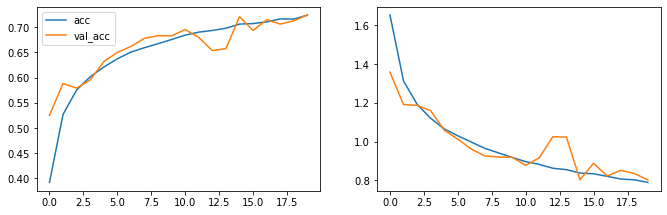

In [47]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

El modelo consta de 222.410 parametros para entrenar y 11 capas: 

La primera capa es una convolucional con un valor o tamaño de salida de 32x32x32. Los parametros que va a tener que aprender en esta capa son de 2432 y con 32 kernels a aplicar por cada capa.
La segunda capa es de pooling, exactamente max pooling. Al tener tanto un pool size y un stride de 2x2, reduciremos a la mitad el tamaño de nuestra imagen.
La tercera capa es un dropout. Esta técnica difiere de las vistas hasta el momento. El procedimiento es sencillo: por cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta. Lo que se consigue con esto es que ninguna neurona memorice parte de la entrada; que es precisamente lo que sucede cuando tenemos sobreajuste.
La cuarta capa es una convolucional con un valor de salida de 16x16x64. Los parametros son de 51264 y con 64 kernels.
La quinta capa es de max pooling con un size y stride de 2x2.
La quinta capa es convolucional con 102464 parametros.
La sexta es otra de dropout.
Seguidamente tenemos una capa convolucional, maxpooling, flatten y 2 dense.

Los resultados no son lo buenos que se pueda esperar con un 72% y en el conjunto de test o validación también son de un 72%

<a id="section5"></a>
# <font color="#004D7F" size=5>Conclusión</font>
Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráis tus propias conclusiones.

Después de haber realizado los 4 experimentos para ver cual de ellos llevaría a producción, cada uno con diferentes capas tanto de tipo como de numero, me decantaria por el modelo del experimento 4.
El resultado del valor de acierto es el más elevado de los 4 experimentos: 94%. Seguidamente viene el tercero con un 60% mientras que los dos ultimos se alejan bastante con un 47% y un 10%.
En cuanto a la red neuronal creada por mi, no ha resultado la mejor de las 4 pero si que es la que más se ha acercado con un 72% de acierto.

<div style="text-align: center; font-size: 24px;">
    <img src="images/good-job.jpeg">
    <br>
    ¡Si has llegado hasta aquí deberías estar super orgullos@!
    <br><br>
    Ya puedes relajar tus neuronas, les has dado mucho trabajo
</div>